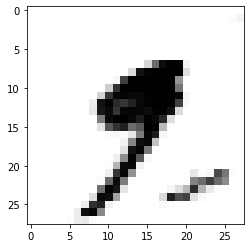

In [4]:
from keras.models import load_model
from keras.utils import to_categorical, plot_model
import matplotlib.pyplot as plt
import numpy as np


def generate_images():
    # load model
    model = load_model('generator_model_cgan_v2.h5')
    # generate images
    latent_points, labels = generate_latent_points(100, 1000)
    # specify labels
    labels = np.asarray([x for _ in range(100) for x in range(10)])
    one_hot_labels = to_categorical(labels)
    # generate images
    X = model.predict([latent_points, one_hot_labels])
    # scale from [-1,1] to [0,1]
    X = (X + 1) / 2.0
    # plot the result
    save_plot(X, labels)


# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples, n_classes=10):
    # generate points in the latent space
    x_input = np.random.randn(latent_dim * n_samples)
    # reshape into a batch of inputs for the network
    z_input = x_input.reshape(n_samples, latent_dim)
    # generate labels
    labels = np.random.randint(0, n_classes, n_samples)
    return [z_input, labels]


# create and save a plot of generated images
def save_plot(examples, labels):
    for i in range(1000):
        plt.imshow(examples[i, :, :, 0], cmap='gray_r')
        plt.savefig('images/{}/img_{}.png'.format(labels[i], i))

generate_images()